In [2]:
import pandas as pd
df = pd.read_excel('datakelulusanmahasiswa.xls')

In [3]:
#Menampilkan 5 data pertama
df.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [27]:
#Mengecek nilai kosong
df.isnull().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

Mengecek jumlah data kosong (NaN) di setiap kolom.
Langkah ini penting agar tidak ada data hilang yang bisa mengganggu model Machine Learning.

In [28]:
#Menghapus nilai kosong
df = df.dropna()

Menghapus semua baris yang memiliki nilai kosong.
Langkah ini dilakukan agar dataset bersih sebelum dilakukan eksplorasi dan modeling.

In [6]:
#Mengecek nilai kosong
df.isnull().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

Verifikasi bahwa semua nilai kosong telah berhasil dihapus.
Jika hasilnya semua nol, maka dataset sudah clean.

In [7]:
#Menampilkan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              369 non-null    object 
 1   JENIS KELAMIN     369 non-null    object 
 2   STATUS MAHASISWA  369 non-null    object 
 3   UMUR              369 non-null    int64  
 4   STATUS NIKAH      369 non-null    object 
 5   IPS 1             369 non-null    float64
 6   IPS 2             369 non-null    float64
 7   IPS 3             369 non-null    float64
 8   IPS 4             369 non-null    float64
 9   IPS 5             369 non-null    float64
 10  IPS 6             369 non-null    float64
 11  IPS 7             369 non-null    float64
 12  IPS 8             369 non-null    float64
 13  IPK               369 non-null    float64
 14  STATUS KELULUSAN  369 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 46.1+ KB


In [8]:
# Hapus spasi di awal/akhir nama kolom
df.columns = df.columns.str.strip()

Mencegah error pemanggilan kolom.
Menjaga konsistensi nama kolom.
Memastikan data siap untuk analisis lanjutan seperti encoding, visualisasi, dan modeling.

In [9]:
#Statistik umum
df.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,369.00000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,25.96477,2.852575,2.804986,2.900976,2.787669,2.781518,2.892385,2.551301,1.263198,2.937182
std,3.42487,0.411856,0.472474,0.582213,0.630278,0.591765,0.596654,0.722284,1.394900,0.450239
min,22.00000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.00000,2.600000,2.530000,2.550000,2.460000,2.480000,2.590000,2.170000,0.000000,2.750000
50%,25.00000,2.860000,2.840000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000
75%,27.00000,3.100000,3.100000,3.310000,3.180000,3.190000,3.320000,3.110000,2.750000,3.220000
max,50.00000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


In [10]:
# Jumlah mahasiswa per status kelulusan
df['STATUS KELULUSAN'].value_counts()

STATUS KELULUSAN
TEPAT        206
TERLAMBAT    163
Name: count, dtype: int64

In [11]:
# Rata-rata IPK per status kelulusan
df.groupby('STATUS KELULUSAN')['IPK'].mean()

STATUS KELULUSAN
TEPAT        3.037524
TERLAMBAT    2.810368
Name: IPK, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

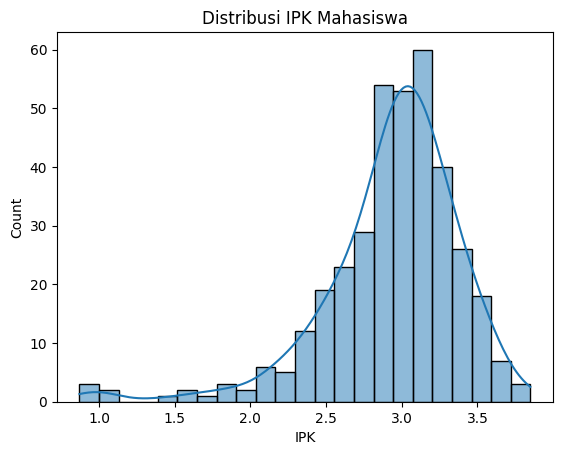

In [13]:
# Distribusi IPK
sns.histplot(df['IPK'], kde=True)
plt.title('Distribusi IPK Mahasiswa')
plt.show()

Sumbu X (horizontal): Menunjukkan rentang nilai IPK mahasiswa (sekitar dari 1.0 hingga 3.8).
Sumbu Y (vertikal): Menunjukkan jumlah mahasiswa (frekuensi) yang memiliki IPK pada rentang tertentu.
Batang histogram: Setiap batang mewakili banyaknya mahasiswa dengan IPK dalam interval tertentu.
Garis biru halus (KDE): Menunjukkan pola sebaran IPK secara kontinu, membantu melihat apakah distribusinya normal, miring ke kanan, atau ke kiri.
Mayoritas mahasiswa memiliki IPK baik (sekitar 3.0 ke atas).
Distribusi IPK tidak simetris, tetapi sedikit condong ke kiri (karena lebih banyak nilai tinggi daripada rendah).
Visualisasi seperti ini penting untuk Exploratory Data Analysis (EDA) agar kamu memahami karakteristik data sebelum melakukan model prediksi kelulusan.

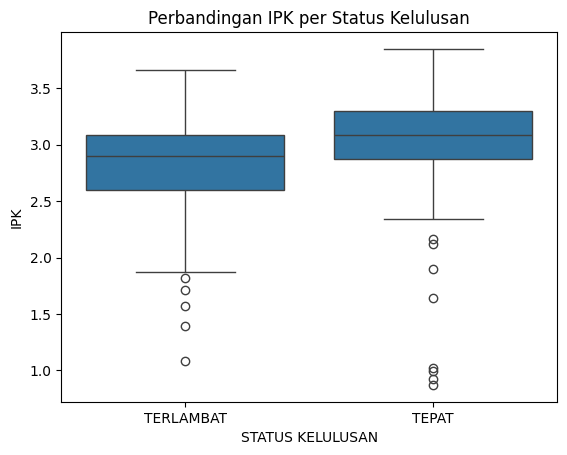

In [14]:
# Perbandingan IPK antara mahasiswa yang Tepat Waktu dan Terlambat
sns.boxplot(data=df, x='STATUS KELULUSAN', y='IPK')
plt.title('Perbandingan IPK per Status Kelulusan')
plt.show()

Kotak (box)	Menunjukkan rentang nilai IPK dari kuartil bawah (Q1) ke kuartil atas (Q3) — yaitu 50% data utama.
Garis dalam kotak (median)	Nilai tengah IPK dari kelompok tersebut.
Garis vertikal di atas dan bawah (whiskers)	Menunjukkan rentang data di luar kuartil, tapi masih dianggap “normal”.
Titik-titik di luar whisker	Disebut outlier — mahasiswa dengan IPK yang jauh lebih rendah atau tinggi dari mayoritas.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [16]:
# Pilih fitur dan target
X = df[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK']]
y = df['STATUS KELULUSAN']

X → berisi fitur atau variabel input yang digunakan untuk memprediksi hasil.
Dalam hal ini, fitur yang dipakai adalah:
UMUR (usia mahasiswa)
IPS 1 sampai IPS 8 (nilai indeks prestasi per semester)
IPK (Indeks Prestasi Kumulatif)
y → berisi target output atau variabel yang ingin diprediksi, yaitu STATUS KELULUSAN mahasiswa.
Nilainya berupa teks seperti "TEPAT" dan "TERLAMBAT".

In [17]:
#Encode target jadi angka
y = df['STATUS KELULUSAN'].map({'TERLAMBAT': 0, 'TEPAT': 1})

In [18]:
print("Jumlah NaN setelah mapping:", y.isna().sum())
print("Nilai unik setelah mapping:", y.unique())

Jumlah NaN setelah mapping: 0
Nilai unik setelah mapping: [0 1]


In [19]:
# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Buat model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# Prediksi
y_pred = model.predict(X_test)

In [29]:
# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.8378378378378378
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        40
           1       0.78      0.91      0.84        34

    accuracy                           0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.85      0.84      0.84        74



In [23]:
df.describe(include='all')

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
count,369,369,369,369.00000,369,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369
unique,366,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SUGIYANTO,LAKI - LAKI,MAHASISWA,NaN,BELUM MENIKAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TEPAT
freq,2,229,236,NaN,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206
mean,NaN,NaN,NaN,25.96477,NaN,2.852575,2.804986,2.900976,2.787669,2.781518,2.892385,2.551301,1.263198,2.937182,NaN
std,NaN,NaN,NaN,3.42487,NaN,0.411856,0.472474,0.582213,0.630278,0.591765,0.596654,0.722284,1.394900,0.450239,NaN
min,NaN,NaN,NaN,22.00000,NaN,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000,NaN
25%,NaN,NaN,NaN,24.00000,NaN,2.600000,2.530000,2.550000,2.460000,2.480000,2.590000,2.170000,0.000000,2.750000,NaN
50%,NaN,NaN,NaN,25.00000,NaN,2.860000,2.840000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000,NaN
75%,NaN,NaN,NaN,27.00000,NaN,3.100000,3.100000,3.310000,3.180000,3.190000,3.320000,3.110000,2.750000,3.220000,NaN


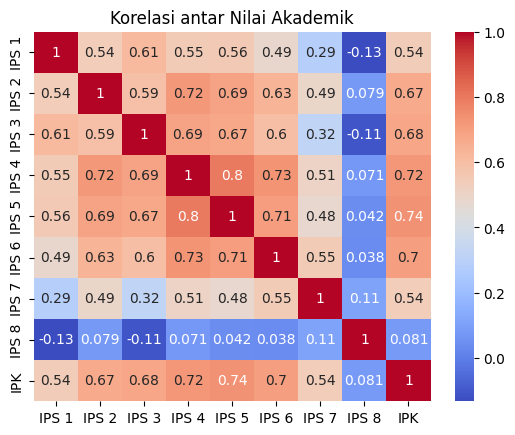

In [31]:
corr = df[[c for c in df.columns if 'IPS' in c or c == 'IPK']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Nilai Akademik')
plt.show()